# 🌲 Random Forest Hyperparameters — COMPLETE GUIDE
### Classification + Regression | Theory + Intuition + Math + Practice

---

## 1. High-level Hyperparameters (Forest-level)

These control the **ensemble itself**.

### 1.1 `n_estimators`
Number of trees in the forest.

$$
\text{Final prediction} =
\begin{cases}
\text{majority vote} & \text{(classification)} \\\\
\text{mean prediction} & \text{(regression)}
\end{cases}
$$

- Low value → high variance
- High value → stable, but slower
- Typical range: **$100$ – $500$**

---

### 1.2 `max_features`
Number of features considered **at each split**.

Let total features = $d$

| Value | Meaning |
|-----|--------|
| `"sqrt"` | $\sqrt{d}$ (default for classification) |
| `"log2"` | $\log_2 d$ |
| `None` | all features |
| float $p$ | $p \times d$ |
| int $k$ | exactly $k$ features |

📌 **Key idea**:  
Random Forest does **node-level feature sampling**, not tree-level.

This increases **decorrelation** between trees.

---

### 1.3 `bootstrap`
Whether sampling is done **with replacement**.

- `True` → classic Random Forest
- `False` → uses full data per tree (less randomness)

---

### 1.4 `max_samples`
Fraction or number of rows per tree.

If dataset size = $N$

- float $p$ → $pN$ rows
- int $k$ → $k$ rows

📌 Best range: **$0.5$ – $0.75$**

Too small → high bias  
Too large → higher variance

---

## 2. Tree-level Hyperparameters (Bias–Variance control)

These control **each decision tree**.

---

### 2.1 `max_depth`
Maximum depth of each tree.

- Small → underfitting (high bias)
- Large → overfitting (high variance)

📌 RF works best with **deep but noisy trees**

---

### 2.2 `min_samples_split`
Minimum samples required to split a node.

$$
n_{node} \ge \text{min\_samples\_split}
$$

- Larger → smoother boundary
- Smaller → aggressive splits

---

### 2.3 `min_samples_leaf`
Minimum samples in a leaf.

Ensures prediction stability:

$$
\hat{y}_{leaf} = \frac{1}{n} \sum y_i
$$

- Prevents tiny noisy leaves
- Very important for regression

---

### 2.4 `max_leaf_nodes`
Hard limit on number of leaves.

Directly controls model complexity.

---

### 2.5 `min_impurity_decrease`
Split happens only if:

$$
\Delta I \ge \text{threshold}
$$

Used for **early stopping**.

---

## 3. Split Criterion (Loss function)

### Classification:
- `"gini"`:
$$
G = 1 - \sum p_k^2
$$

- `"entropy"`:
$$
H = -\sum p_k \log p_k
$$

### Regression:
- `"squared_error"`:
$$
\text{MSE} = \frac{1}{n}\sum (y - \hat{y})^2
$$
- `"absolute_error"` (robust to outliers)

---

## 4. Sampling & Class Control

### 4.1 `class_weight`
Used for **imbalanced datasets**.

$$
\text{weighted loss} = w_c \cdot \text{loss}
$$

Options:
- `None`
- `"balanced"`
- `{class: weight}`

---

## 5. Performance & Reproducibility

### 5.1 `n_jobs`
Parallelism.

- `-1` → use all CPU cores

---

### 5.2 `random_state`
Controls randomness for:
- row sampling
- feature sampling

Ensures reproducibility.

---

### 5.3 `verbose`
Controls training logs.

---

### 5.4 `warm_start`
Allows incremental training:

$$
n_{\text{trees}}^{new} = n_{\text{old}} + \Delta
$$

---

## 6. Cost-Complexity Pruning

### `ccp_alpha`
Post-pruning strength.

$$
R_\alpha(T) = R(T) + \alpha |T|
$$

- $\alpha = 0$ → no pruning
- Higher $\alpha$ → simpler trees

---

## 7. Classification vs Regression Differences

| Parameter | Classification | Regression |
|--------|--------------|-----------|
| criterion | gini / entropy | mse / mae |
| voting | majority | mean |
| bias sensitivity | lower | higher |

Everything else is identical.

---

## 8. Recommended Defaults (Real-world)

```python
RandomForestClassifier(
    n_estimators=300,
    max_features="sqrt",
    max_samples=0.7,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
)
9. Interview One-liners

Random Forest reduces variance, not bias

Uses node-level feature sampling

Deep trees + averaging = stability

More randomness → better generalization

Better than bagging due to extra decorrelation

Final Takeaway

Random Forest works because it converts:

Low-bias, high-variance trees
into
Low-bias, low-variance ensemble

using bootstrapping + feature randomness + aggregation.

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [30]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
X.shape

(500, 2)

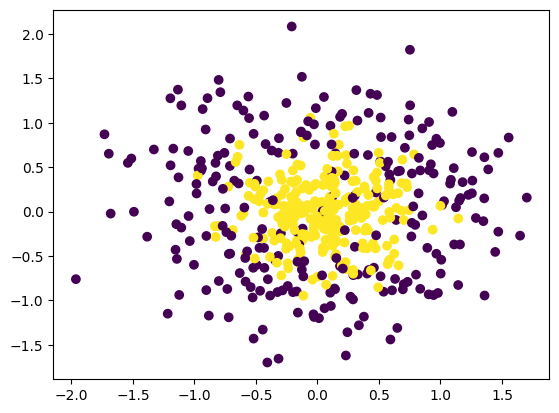

In [32]:
plt.scatter(X[:,0],X[:,1],c=y)

In [33]:
from sklearn.tree import DecisionTreeClassifier

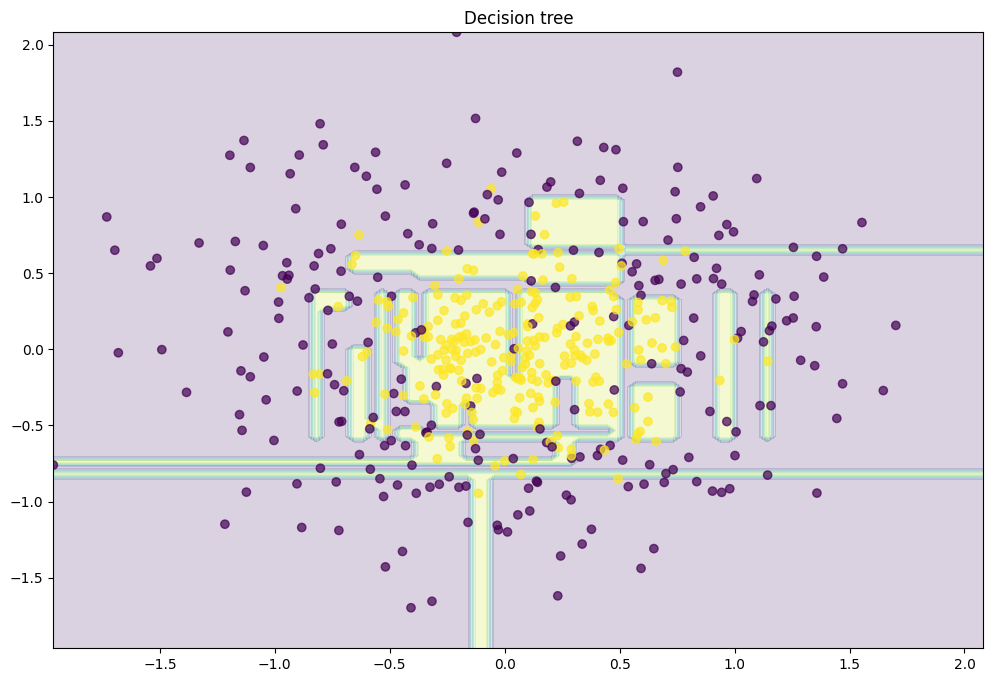

In [34]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier

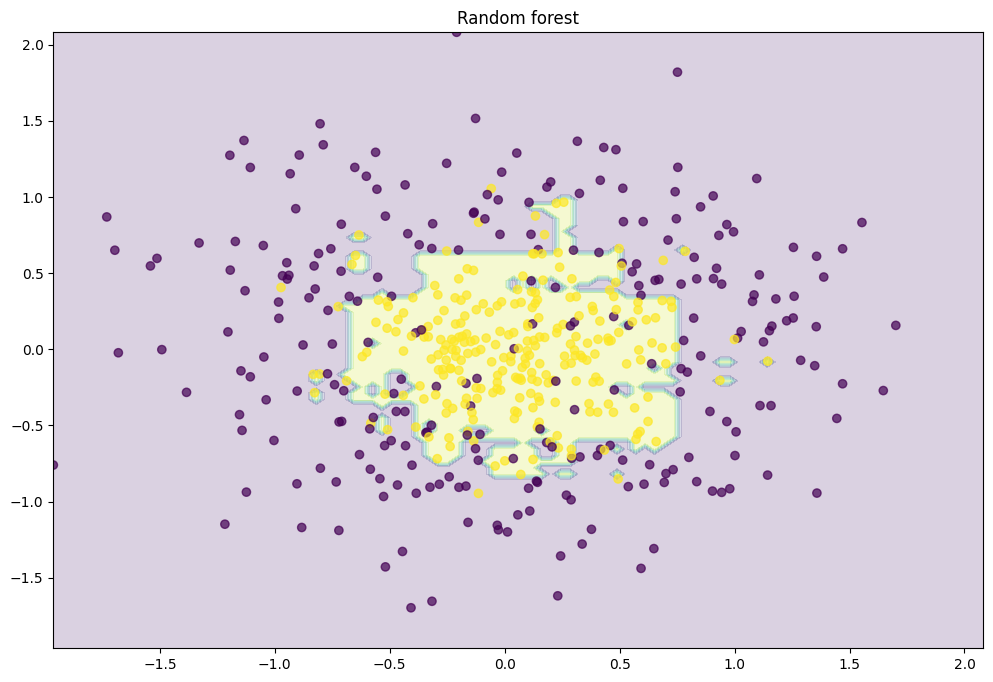

0.91

In [49]:
rf = RandomForestClassifier(n_estimators=450, random_state=49)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()
import sklearn
sklearn.metrics.accuracy_score(y_test, rf.predict(X_test))

In [50]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

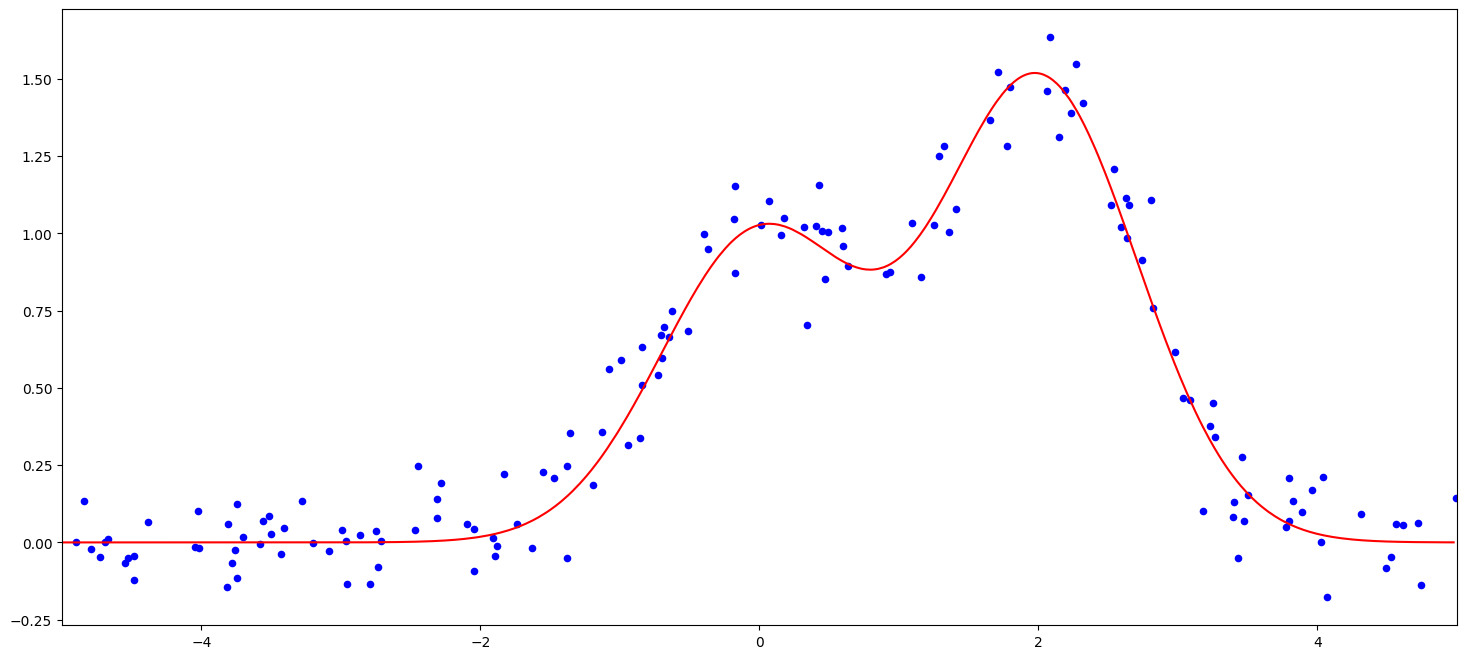

In [51]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

Text(0.5, 1.0, 'Decision tree, MSE = 21.23')

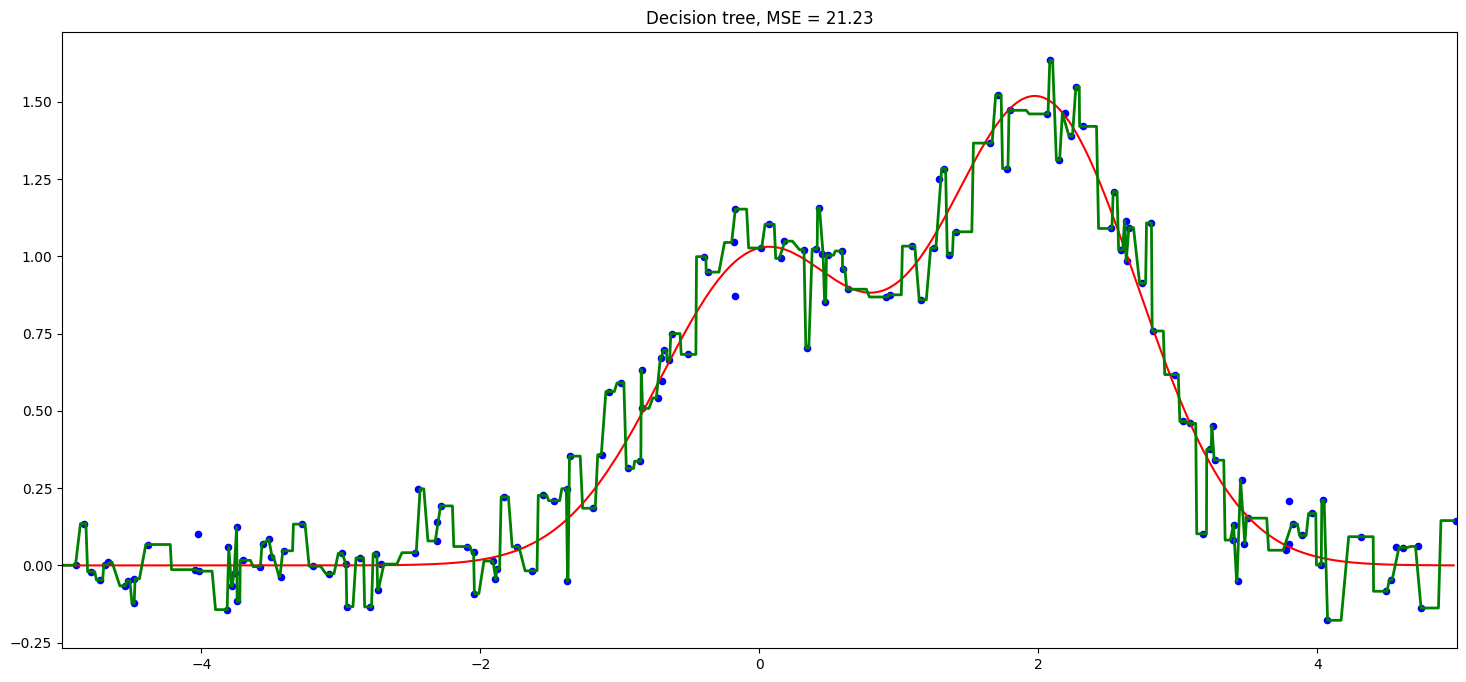

In [52]:

# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))

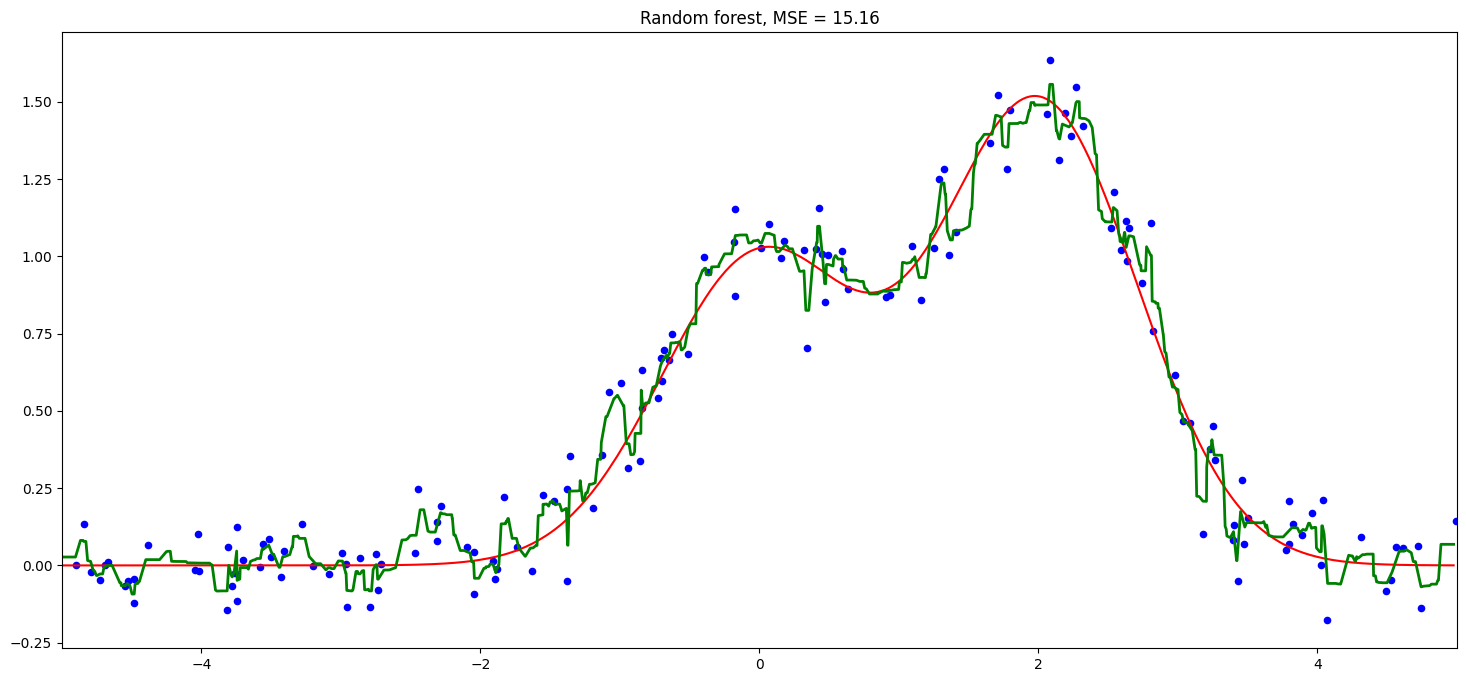

In [59]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=5000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

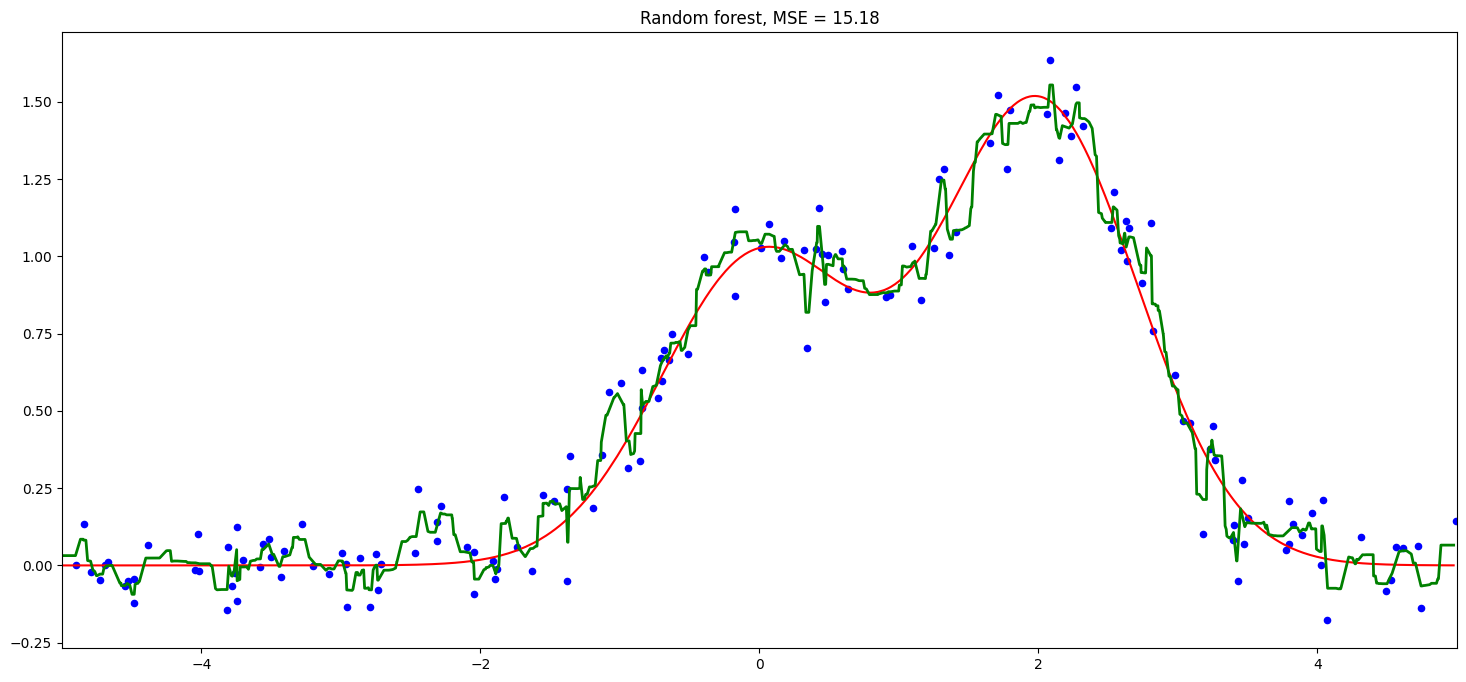

In [60]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=500).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

train, X_test_clf, trainn, y_test_clf = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred_rf = rf.predict(X_test_clf)
cm = confusion_matrix(y_test_clf, y_pred_rf)

print("Confusion Matrix for Random Forest Classifier:")
print(cm)

Confusion Matrix for Random Forest Classifier:
[[41  2]
 [ 7 50]]
